In [152]:
import os
import sys
import pandas as pd
import numpy as np
import pathlib
import xlrd
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn

In [243]:
root = pathlib.Path(os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop') + "/SearchTool_Matches/")
cortsubslist = [499]
#neolisttemp = [root / 'NEO/' / x for x in os.listdir(root / 'NEO/') if any("PREEMPT1_%04d" % y in x for y in cortsubslist)]
neolisttemp = [root / 'NEO/' / x for x in os.listdir(root / 'NEO/')]
invertlist = [0,3,6,7,9,10,13,16,17,19,20,23,26,27,29,31,32,34,35,38,41,42,44,45,48,51,52,54,55,58,60,63,66,67,69,70,73,76,77,79,80,83,86,87,89,91,92,94,95,98,101,102,104,105,108,111,112,114,115,118,120,123,126,127,129,133,136,137,139,140,143,146,147,149,152,154,155,158,161,162,165,168,172,174,175,180,182,186,188,189,197,198,204,205,206,207,212,218,219,221,227,228,230,233,235,237]
msceitlisttemp = [root / 'MSCEIT' / x for x in os.listdir(root / 'MSCEIT')]
eqilisttemp = [root / 'EQI2' / x for x in os.listdir(root / 'EQI2')]
wasilisttemp = [root / 'WASI' / x for x in os.listdir(root / 'WASI')]

In [232]:
that=[]
sub = []
for x in neolisttemp:
    temp = pd.read_csv(x, delimiter=',', index_col=False)
    items = temp.iloc[:,2:242]
    subid = temp.iloc[:,0].iloc[0]
    spectrumlist = []
    this = items.values.tolist()
    for i, x in enumerate(this[0]):
        if i not in invertlist:
            spectrumlist.append(x)
        else:
            spectrumlist.append(abs(x-4))
    randcheck = False
    conslist = []
    indconslist = []
    for i, x in enumerate(spectrumlist):
        if len(conslist) == 0:
            conslist.append(x)
            indconslist.append(i)
        else:
            if y == conslist[0]:
                conslist.append(x)
                indconslist.append(i)
            else:
                l = len(conslist)
                n = conslist[0] #0:strongly disagree; 1:disagree; 2:neutral; 3:agree; 4:strongly agree
                if (l > 6 and n == 0) or (l > 9 and n == 1) or (l > 10 and n == 2) or (l > 14 and n == 3) or (l > 9 and n == 4):
                    print(conslist)
                    print(indconslist)
                    randcheck = True
                conslist = [x]
                indconslist = [i]
    if randcheck == False:
        #print('\033[0m'+'%s: Responding determined to be non-random' % subid)
        pass
    else:
        print('\033[1m'+'%s: Responding determined to be random' % subid)
    acq = spectrumlist.count(4)+spectrumlist.count(3)
    if acq > 149:
        print('\033[1m'+'%s: Responding determined to be biased by acquiescence - Total Agree and Strongly Agree = %s' % (subid,acq))
    elif acq < 51:
        print('\033[1m'+'%s: Responding determined to be biased by nay-saying - Total Agree and Strongly Agree = %s' % (subid,acq))
    else:
        pass
        #print('\033[0m'+'%s: Responding determined to NOT be biased by acquiescence or nay-saying' % subid)
    that.append(acq)
    sub.append(subid)

PREEMPT1_0212: Responding determined to be biased by acquiescence - Total Agree and Strongly Agree = 150
PREEMPT1_0499: Responding determined to be biased by acquiescence - Total Agree and Strongly Agree = 150


In [235]:
for x in msceitlisttemp:
    try:
        wb = xlrd.open_workbook(x, logfile=open(os.devnull, 'w'))
        temp = pd.read_excel(wb, sheet_name='MSCEIT_Demographic_and_Scores', engine='xlrd')
        subid = temp.iloc[:,0].iloc[0]           
        posnegbias = temp['SS_PosNeg'][0]
        scatter = temp['SS_Scat'][0]
        if posnegbias >= 130:
            print('\033[1m'+'%s: Positive Bias Detected - PosNeg = %s' % (subid, posnegbias))
        elif posnegbias <=70:
            print('\033[1m'+'%s: Negative Bias Detected - PosNeg = %s' % (subid, posnegbias))
        else:
            pass
            #print('\033[0m'+'%s: No Bias Detected - Score = %s' % (subid, posnegbias))
        if scatter >= 130:
            print('\033[1m'+'%s: Scatter Unusually High - ScatScore = %s' % (subid, scatter))
        elif scatter <=70:
            print('\033[1m'+'%s: Scatter Unusually Low - ScatScore = %s' % (subid, scatter))
        else:
            pass
            #print('\033[0m'+'%s: Scatter Typical - ScatScore = %s' % (subid, scatter))
    except:
        pass

PREEMPT1_0071: Scatter Unusually High - ScatScore = 138.942063335322
PREEMPT1_0100: Scatter Unusually High - ScatScore = 130.977620889583
PREEMPT1_0165: Scatter Unusually High - ScatScore = 143.539678221224
PREEMPT1_0203: Scatter Unusually Low - ScatScore = 65.01480865479779
PREEMPT1_0236: Positive Bias Detected - PosNeg = 137.238321487306
PREEMPT1_0329: Positive Bias Detected - PosNeg = 131.850362096678
PREEMPT1_0334: Scatter Unusually High - ScatScore = 132.026140797007
PREEMPT1_0499: Positive Bias Detected - PosNeg = 140.95164485111601


In [244]:
sublist = []
poslist = []
neglist = []
inclist = []
for x in eqilisttemp:
    try:
        wb = xlrd.open_workbook(x, logfile=open(os.devnull, 'w'))
        temp = pd.read_excel(wb, sheet_name='EQ_i_2.0_Scores', engine='xlrd')
        crit = pd.read_excel(wb, sheet_name='EQ_i_2.0_Item_Responses', engine='xlrd')
        sublist.append(temp.iloc[:,1].iloc[0])           
        poslist.append(temp['PI_R'][0])
        neglist.append(temp['NI_R'][0])
        inclist.append(temp['II_R'][0])
    except:
        pass
posav = np.mean(poslist); possd = np.std(poslist)
negav = np.mean(neglist); negsd = np.std(neglist)
incav = np.mean(inclist); incsd = np.std(inclist)
for i, x in enumerate(poslist):
    if ((x > posav+(2*possd)) or (x < posav-(2*possd))):
        print('%s is positively biased' % sublist[i])
        print(eqilisttemp[i])
for i, x in enumerate(neglist):
    if ((x > negav+(2*negsd)) or (x < negav-(2*negsd))):
        print('%s is negatively biased' % sublist[i])

PREEMPT1_0212 PREEMPT1_0212 is positively biased
C:\Users\kylelafollette\Desktop\SearchTool_Matches\EQI2\eqi2-PREEMPT1_0212.xls
PREEMPT1_0319 PREEMPT1_0319 is positively biased
C:\Users\kylelafollette\Desktop\SearchTool_Matches\EQI2\eqi2-PREEMPT1_0319.xls
PREEMPT1_0339 PREEMPT1_0339 is positively biased
C:\Users\kylelafollette\Desktop\SearchTool_Matches\EQI2\eqi2-PREEMPT1_0339.xls
PREEMPT1_0344 PREEMPT1_0344 is positively biased
C:\Users\kylelafollette\Desktop\SearchTool_Matches\EQI2\eqi2-PREEMPT1_0344.xls
PREEMPT1_0499 PREEMPT1_0499 is positively biased
C:\Users\kylelafollette\Desktop\SearchTool_Matches\EQI2\eqi2-PREEMPT1_0499.xls
PREEMPT1_0009 PREEMPT1_0009 is negatively biased
PREEMPT1_0035 PREEMPT1_0035 is negatively biased
PREEMPT1_0178 PREEMPT1_0178 is negatively biased
PREEMPT1_0203 PREEMPT1_0203 is negatively biased


r = 0.18459741195585955, p = 0.19016753971344647


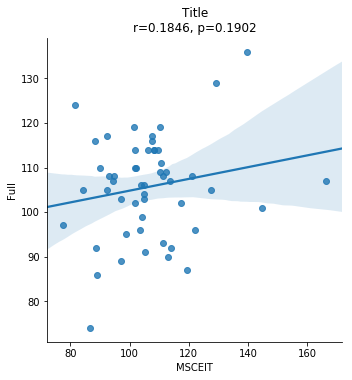

In [167]:
df = pd.DataFrame()
for x in wasilisttemp:
    try:
        temp = pd.read_csv(x, delimiter=',', index_col=False)
    except:
        wb = xlrd.open_workbook(x, logfile=open(os.devnull, 'w'))
        temp = pd.read_excel(wb, engine='xlrd')
    subid = temp.iloc[:,0].iloc[0]
    try:
        int(subid)
        subid = 'PREEMPT1_%04d' % subid
    except:
        pass
    verb = temp['wasi_vci_cscore'][0]
    perf = temp['wasi_pri_cscore'][0]
    full = temp['wasi_fsiq4_cscore'][0]
    this = pd.DataFrame([[subid, verb, perf, full]])
    df = df.append(this, ignore_index=True)
df.columns = ['SubID','Verb','Perf','Full']

msdf = pd.DataFrame()
for x in msceitlisttemp:
    try:
        wb = xlrd.open_workbook(x, logfile=open(os.devnull, 'w'))
        temp = pd.read_excel(wb, sheet_name='MSCEIT_Demographic_and_Scores', engine='xlrd')
        subid = temp.iloc[:,0].iloc[0]  
        msceittot = temp['SS_TOT'][0]
        if subid in df['SubID'].values:
            verb = df.loc[df['SubID'] == subid, 'Verb'].iloc[0]
            perf = df.loc[df['SubID'] == subid, 'Perf'].iloc[0]
            full = df.loc[df['SubID'] == subid, 'Full'].iloc[0]
            this = pd.DataFrame([[subid, msceittot, verb, perf, full]])
            msdf = msdf.append(this, ignore_index=True)
    except:
        pass
msdf.columns = ['SubID','MSCEIT','Verb','Perf','Full']

title = 'Title'
xvar = 'MSCEIT'
yvar = 'Full'
lm = seaborn.lmplot(x=xvar, y=yvar, palette=('r'), data=msdf, legend_out=False)
ax = plt.gca()
ax.set_title("%s\nr=%.4f, p=%.4f" % (title,pearsonr(msdf[xvar],msdf[yvar])[0],pearsonr(msdf[xvar],msdf[yvar])[1]))
print("r = %s, p = %s" % pearsonr(msdf[xvar],msdf[yvar]))
    